In [1]:
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from datetime import date

In [2]:
#Where you set the variables to check your preference.

#The currency of the values in the data are corresponding to your choice of ticker.

#First Selection:
ticker1 = 'BTC-USD' #The value you want to check.

period1_1 = int(time.mktime(datetime.datetime(1970, 9, 17, 23, 59).timetuple())) #The time period you want to start.

period1_2 = int(time.mktime(datetime.datetime.now().timetuple())) #The time period you want to end.

interval1 = '1d' #Interval you want to check ->(1d, 1wk, 1mo) as day, week, month.

#Second Selection:
ticker2 = 'GC=F' #The value you want to check.

period2_1 = int(time.mktime(datetime.datetime(1970, 9, 17, 23, 59).timetuple())) #The time period you want to start.

period2_2 = int(time.mktime(datetime.datetime.now().timetuple())) #The time period you want to end.

interval2 = '1d' #Interval you want to check ->(1d, 1wk, 1mo) as day, week, month.

In [3]:
query_string1 = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker1}?period1={period1_1}&period2={period1_2}&interval={interval1}&events=history&includeAdjustedClose=true' #URL of Historical Data

data1 = pd.read_csv(query_string1, parse_dates=["Date"], index_col= ["Date"]) #Reading the wanted data as CSV.
data1 = data1.dropna() #Deleting the NA values.
#data1 = data1.set_index(['Date']) #Selecting Date as index instead of row numbers.

print(ticker1, "Historical Data:")
data1


BTC-USD Historical Data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...
2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,1.955523e+10
2021-07-23,32305.958984,33581.550781,32057.892578,33581.550781,33581.550781,2.255205e+10
2021-07-24,33593.730469,34490.390625,33424.859375,34292.445313,34292.445313,2.166471e+10


In [4]:
query_string2 = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker2}?period1={period2_1}&period2={period2_2}&interval={interval2}&events=history&includeAdjustedClose=true' #URL of Historical Data

data2 = pd.read_csv(query_string2, parse_dates=["Date"], index_col= ["Date"]) #Reading the wanted data as CSV.
data2 = data2.dropna() #Deleting the NA values.
#data2 = data2.set_index(['Date'] #Selecting Date as index instead of row numbers.

print(ticker2, "Historical Data:")
data2

GC=F Historical Data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0
...,...,...,...,...,...,...
2021-07-20,1812.900024,1824.000000,1810.900024,1810.900024,1810.900024,128.0
2021-07-21,1807.000000,1807.000000,1800.000000,1802.900024,1802.900024,135.0
2021-07-22,1793.599976,1805.000000,1793.599976,1805.000000,1805.000000,2.0


In [5]:
merged_data = pd.merge(data1,data2, on=["Date"], suffixes=(" " + ticker1, " " + ticker2)) #Merging the given two datasets by Date.


print(ticker1, "and", ticker2, "Historical Data:")

earliest_date = str(merged_data.index[0])  
earliest_date = earliest_date[0:10]  
today = str(date.today())
merged_data

BTC-USD and GC=F Historical Data:


,Open BTC-USD,High BTC-USD,Low BTC-USD,Close BTC-USD,Adj Close BTC-USD,Volume BTC-USD,Open GC=F,High GC=F,Low GC=F,Close GC=F,Adj Close GC=F,Volume GC=F
Date,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,1236.199951,1236.199951,1221.900024,1234.400024,1234.400024,10.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,1216.199951,1225.699951,1216.199951,1225.699951,1225.699951,5.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,1218.300049,1218.300049,1215.300049,1215.300049,1215.300049,4.0
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07,1214.900024,1216.800049,1212.400024,1216.800049,1216.800049,7.0
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,4.509950e+07,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-20,30838.285156,31006.187500,29360.955078,29807.347656,29807.347656,2.314827e+10,1812.900024,1824.000000,1810.900024,1810.900024,1810.900024,128.0
2021-07-21,29796.285156,32752.326172,29526.183594,32110.693359,32110.693359,2.820302e+10,1807.000000,1807.000000,1800.000000,1802.900024,1802.900024,135.0
2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,1.955523e+10,1793.599976,1805.000000,1793.599976,1805.000000,1805.000000,2.0


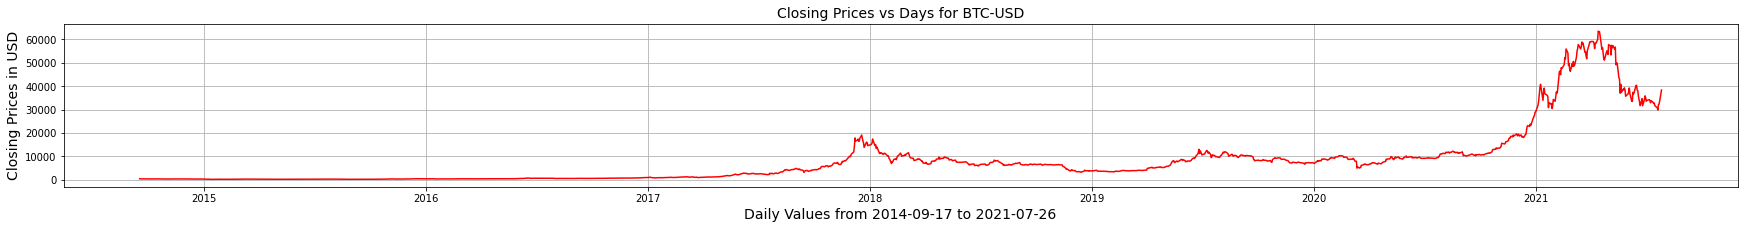

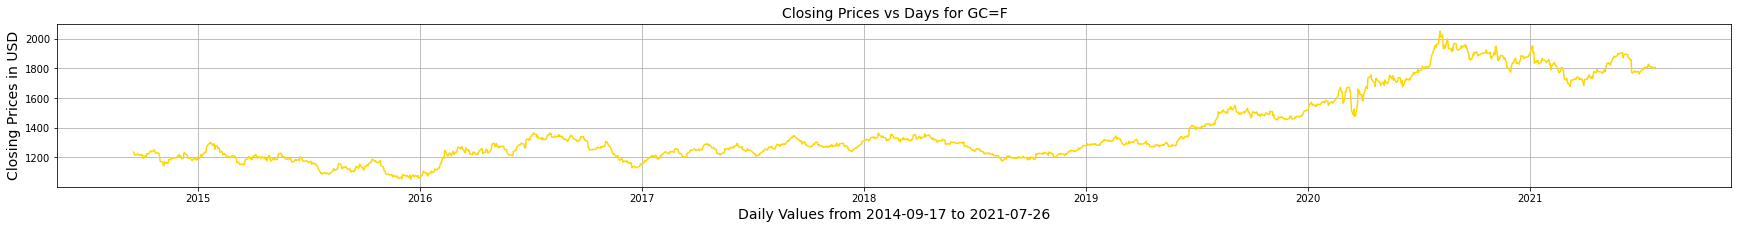

Minimum date for: Close BTC-USD   2015-01-14
dtype: datetime64[ns]
Minimum date for: Close GC=F   2015-12-17
dtype: datetime64[ns]
Maximum date for: Close BTC-USD   2021-04-13
dtype: datetime64[ns]
Maximum date for: Close GC=F   2020-08-06
dtype: datetime64[ns]


,Open BTC-USD,High BTC-USD,Low BTC-USD,Close BTC-USD,Adj Close BTC-USD,Volume BTC-USD,Open GC=F,High GC=F,Low GC=F,Close GC=F,Adj Close GC=F,Volume GC=F
count,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1.707000e+03,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000
mean,8159.879045,8407.781097,7885.072022,8176.920689,8176.920689,1.356701e+10,1380.096367,1386.743000,1373.461336,1380.153310,1380.153310,5749.205624
std,12182.536512,12591.126389,11700.136545,12200.554783,12200.554783,2.099904e+10,241.347697,243.407763,239.244454,241.438140,241.438140,31819.636158
min,176.897003,215.240997,171.509995,178.102997,178.102997,7.845880e+06,1053.699951,1062.000000,1046.199951,1050.800049,1050.800049,0.000000
25%,532.648987,541.716003,523.148986,534.152985,534.152985,7.299160e+07,1216.400024,1222.450012,1211.099976,1218.049988,1218.049988,38.000000
50%,4701.759766,4892.009766,4549.399902,4781.990234,4781.990234,4.273640e+09,1284.699951,1288.400024,1280.300049,1284.900024,1284.900024,145.000000
75%,9342.773926,9510.616211,9180.041992,9332.873535,9332.873535,2.078319e+10,1497.700012,1506.550049,1489.300049,1498.549988,1498.549988,472.000000
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


In [8]:
#Graph for the first Dataset in terms of Closing Prices:
plt.plot(merged_data.index, merged_data["Close "+ticker1], color = "red")
plt.title('Closing Prices vs Days for '+ticker1, fontsize=14)
plt.xlabel('Daily Values from '+earliest_date+' to '+today, fontsize=14, )
plt.ylabel('Closing Prices in USD', fontsize=14)
plt.grid(True)
plt.rcParams["figure.figsize"] = (30,3)
plt.show()

#Graph for the second Dataset in terms of Closing Prices:
plt.plot(merged_data.index, merged_data["Close "+ticker2], color = "gold")
plt.title('Closing Prices vs Days for '+ticker2, fontsize=14)
plt.xlabel('Daily Values from '+earliest_date+' to '+today, fontsize=14)
plt.ylabel('Closing Prices in USD', fontsize=14)
plt.grid(True)
plt.rcParams["figure.figsize"] = (30,3)

plt.show()

percantage_first = merged_data["Close "+ticker1].pct_change()
percantage_second = merged_data["Close "+ticker2].pct_change()

minimum_close_date1 = merged_data[["Close "+ticker1]].idxmin()
print("Minimum date for: " + str(minimum_close_date1))

minimum_close_date2 = merged_data[["Close "+ticker2]].idxmin()
print("Minimum date for: " + str(minimum_close_date2))

maximum_close_date1 = merged_data[["Close "+ticker1]].idxmax()
print("Maximum date for: " + str(maximum_close_date1))

maximum_close_date2 = merged_data[["Close "+ticker2]].idxmax()
print("Maximum date for: " + str(maximum_close_date2))

merged_data.describe()


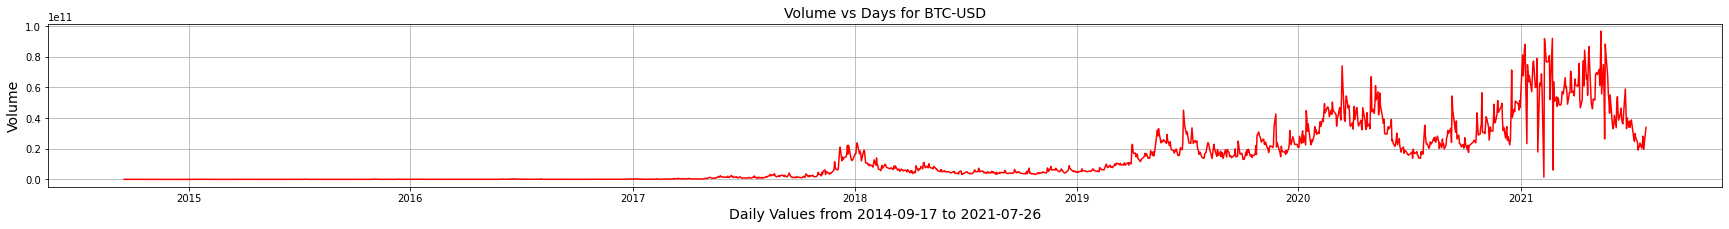

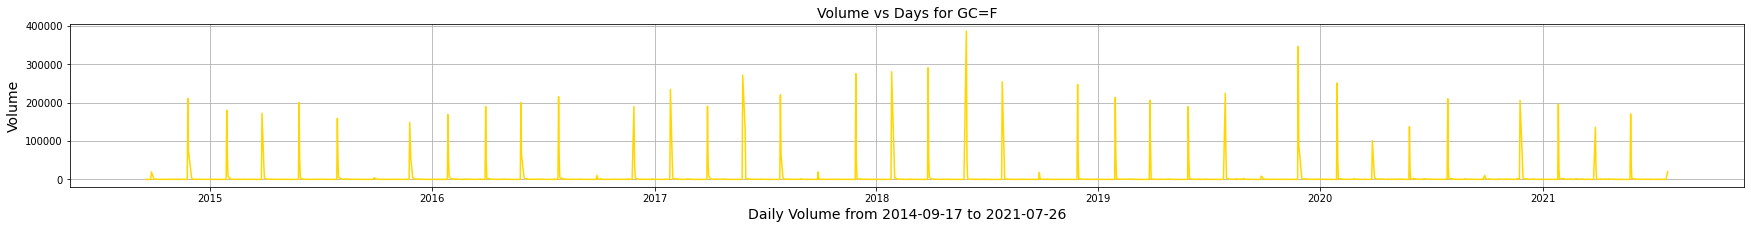

In [7]:
#Graph for the first Dataset in terms of Volume :
plt.plot(merged_data.index, merged_data["Volume "+ticker1]%100000000000, color = "red")
plt.title('Volume vs Days for '+ticker1, fontsize=14)
plt.xlabel('Daily Values from '+earliest_date+' to '+today, fontsize=14, )
plt.ylabel('Volume', fontsize=14)
plt.grid(True)
plt.rcParams["figure.figsize"] = (30,3)
plt.show()

#Graph for the second Dataset in terms of Volume :
plt.plot(merged_data.index, merged_data["Volume "+ticker2]%100000000000, color = "gold")
plt.title('Volume vs Days for '+ticker2, fontsize=14)
plt.xlabel('Daily Volume from '+earliest_date+' to '+today, fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(True)
plt.rcParams["figure.figsize"] = (30,3)

plt.show()